In [6]:
import pandas as pd
import matplotlib
from gen_euler_estimator import EulerEstimator

{'a': 0.55, 'b': -0.5, 'c': -1.3000000000000003}
[(-0.4, {'a': -0.45, 'b': -0.05, 'c': 0}), (1.6, {'a': 0.6500000000000001, 'b': -1.05, 'c': -2.6000000000000005}), (3.6, {'a': 3.95, 'b': -1.8499999999999999, 'c': 2.8000000000000007}), (5.6, {'a': 13.850000000000001, 'b': 2.3500000000000014, 'c': 17.000000000000004})]


In [4]:
def da_dt(t, state):
    return state['a'] + 1


def db_dt(t, state):
    return state['a'] + state['b']


def dc_dt(t, state):
    return 2 * state['b'] + 3 * t


derivatives = {
    'a': da_dt,
    'b': db_dt,
    'c': dc_dt
}

initial_state = {'a': -0.45, 'b': -0.05, 'c': 0}
initial_point = (-0.4, initial_state)


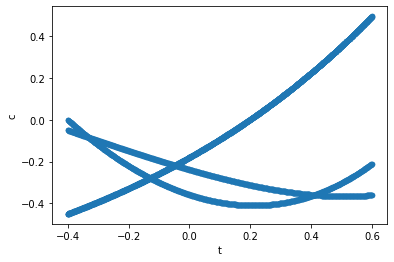

In [60]:
euler = EulerEstimator(derivatives)


estimated_points = euler.calc_estimated_points(initial_point, step_size=0.001, num_steps=1000)
state_dict = {dimension: [point[1][dimension] for point in estimated_points] for dimension in euler.dimensions}
t_list = [point[0] for point in estimated_points]
df_dict = {'t': t_list}
df_dict.update(state_dict)
df = pd.DataFrame(df_dict)
plot = df.plot(kind="scatter", x="t", y="a")
for dimension in state_dict:
    plot = df.plot(kind="scatter", x="t", y=dimension, ax=plot)